In [11]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import scipy.io
import imageio
from shutil import copyfile
%matplotlib inline

In [12]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def get_most_sim(target):
    max_sim = 0
    max_sim_id = False
    for img_id in img_labels:

        this_sim = similar(target, img_id)
        if this_sim > max_sim:
            max_sim = this_sim
            max_sim_id = img_id
            
    return [max_sim, max_sim_id]

def get_all_file_in_path(root):
    filenames = []
    labels = []
    for path, subdirs, files in os.walk(root):
        for name in files:
            filenames.append(path + '/'  + name)
            labels.append(name)
    
    return filenames, labels


def create_dir_if_not(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    

In [13]:
segments_path = "other-categories-seg/"
images_path   = "othercategories/"

New_segments_path = "NewCleanDataSet/seg/"
New_images_path   = "NewCleanDataSet/image/"

In [14]:
seg_labels = [label for label in os.listdir(segments_path)]
img_labels = [label for label in os.listdir(images_path)]

In [15]:
len(seg_labels), len(img_labels)

(282, 472)

In [16]:
i = 0
j = 0
for seg_id in seg_labels:
    if (seg_id in img_labels):
#         print("{} - have image : {}".format(seg_id, seg_id in img_labels))
        i = i + 1
    else:
        sim, im_id = get_most_sim(seg_id)
        question = "{} | {} ({})".format(seg_id,im_id,np.round(sim,2))
        print(question)
        j = j + 1
        
print("correct {} : wrong {}".format(i, j))

chicken-dumpling | chicken-wing (0.79)
filled-bun | fried-lungs (0.67)
fried-beef | fried-kuey-teow (0.64)
bun-keras | bun-kaya (0.71)
red-bean-dumpling | mee-bandung (0.64)
bakso | cakoi (0.6)
mustard-powder | custard-powder (0.93)
mashed-potato | potato (0.63)
cocoa-powder | ice-cream-powder (0.71)
curry-powder | custard-powder (0.77)
chocolate-muffin | chocolate-raisins (0.73)
butter | bakkutteh (0.67)
chocolate-cereal | chocolate-raisins (0.73)
correct 269 : wrong 13


In [17]:
all_valed_paths_segs = []
all_valed_paths_imgs = []
i = 0
j = 0
for seg_id in seg_labels:

    path_of_seg = "{}{}/".format(segments_path, seg_id)
    seg_full_filenames, seg_file_names = get_all_file_in_path(path_of_seg)
    
    path_of_img = "{}{}/".format(images_path, seg_id)
    img_full_filenames, img_file_names = get_all_file_in_path(path_of_img)
    
    
    for seg_file, seg_file_full in zip(seg_file_names,seg_full_filenames):
        seg_file = seg_file.split(".")[0]
        img_files = [f.split(".")[0] for f in img_file_names]
        if seg_file not in img_files:
#             print(seg_file, img_files)
            i = i + 1
        else:
            all_valed_paths_segs.append(seg_file_full)
            im_file_full = seg_file_full.replace(segments_path, images_path).split(".")[0]
            matching = [s for s in img_full_filenames if im_file_full in s]
            all_valed_paths_imgs.append(matching[0])
            j = j + 1
#     seg_ = [label for label in os.listdir(segments_path)]
#     for root in seg_:
#         list1 = [ os.path.join(os.path.abspath(root), elem) for elem in files if elem ]
print("Number of missing files : ", i)
print("Number of found files : ", j)

Number of missing files :  700
Number of found files :  12478


In [18]:
# i = 0
# j = 0
# for sg, im in tqdm(zip(all_valed_paths_segs,all_valed_paths_imgs),total=len(all_valed_paths_segs)):
    
#     seg_src = sg
#     img_src = im
    
#     seg_dst = seg_src.replace(segments_path ,New_segments_path)
#     img_dst = img_src.replace(images_path   ,New_images_path)
    
    
#     create_dir_if_not('/'.join(seg_dst.split("/")[:-1]))
#     create_dir_if_not('/'.join(img_dst.split("/")[:-1]))
    
#     copyfile(seg_src, seg_dst)
#     copyfile(img_src, img_dst)

In [19]:
len(all_valed_paths_segs)/len(seg_labels)

44.248226950354606

In [20]:
# import os
# directory = os.getcwd()
# list1 = []

# for root, subfolders, files in os.walk('.'):
#       all_files = [os.path.join(os.path.abspath(root), elem) for elem in files if elem ]
# # clean the list from empty elements
# # final_list = [ x for x in list1 if x != [] ]

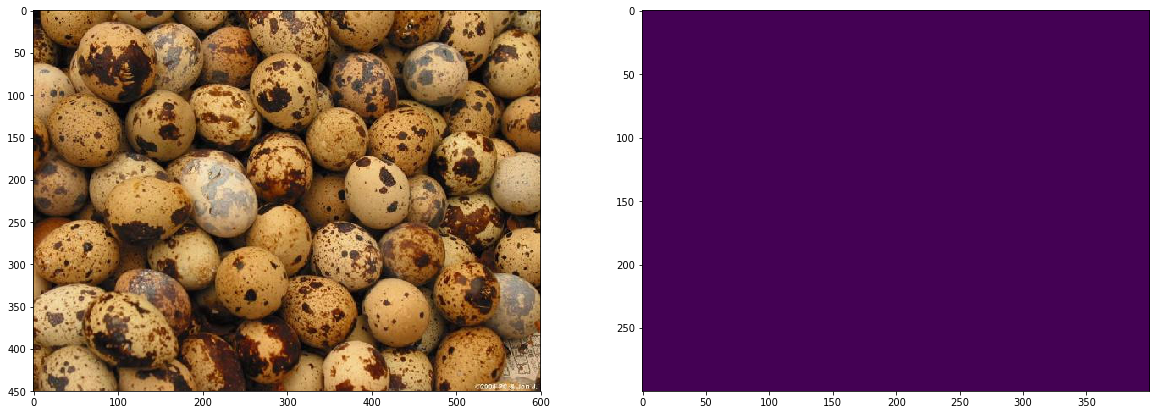

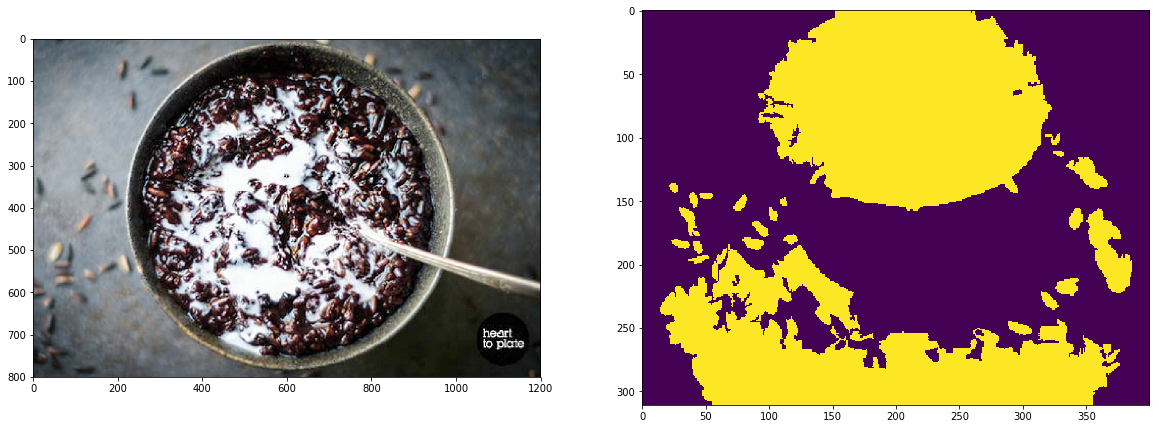

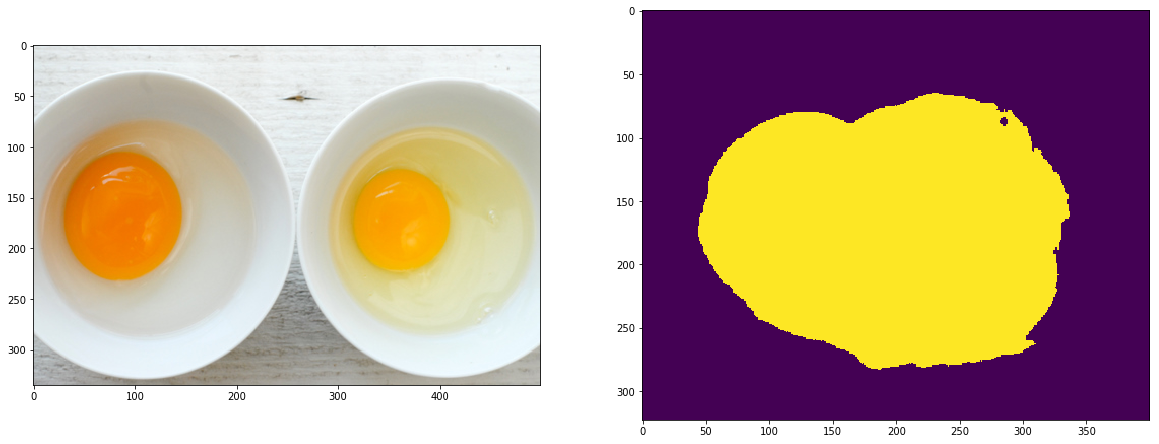

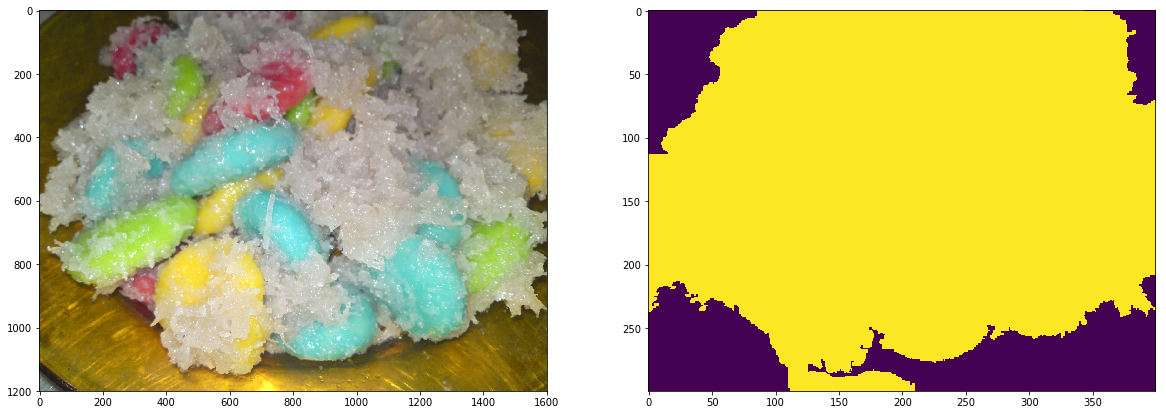

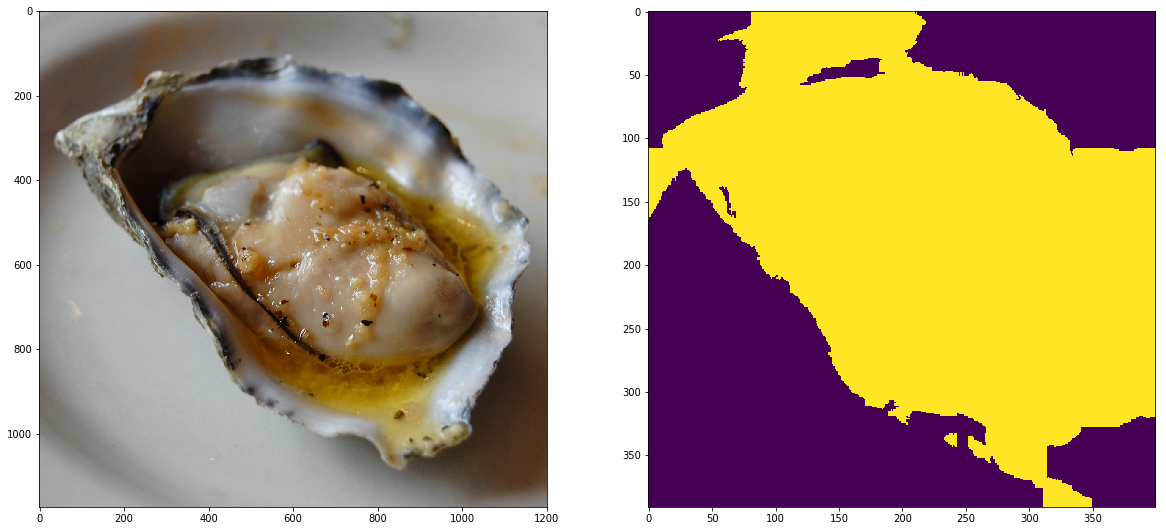

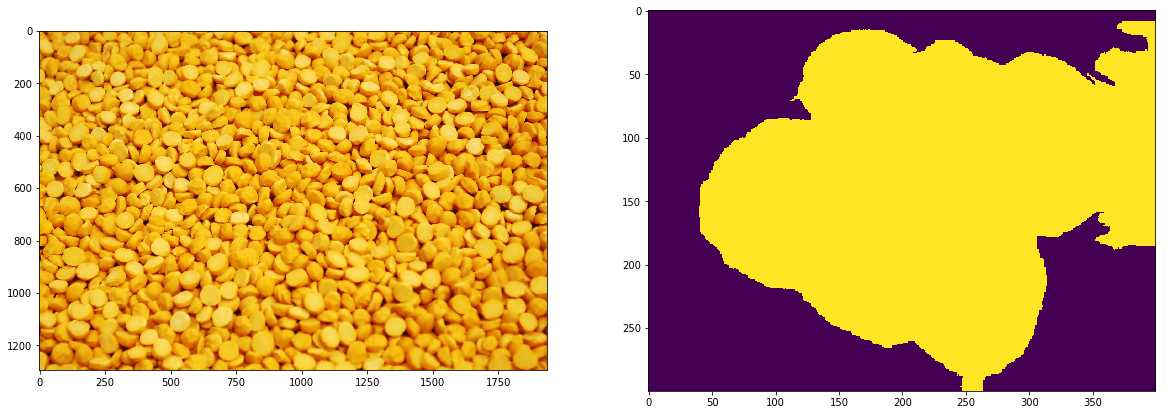

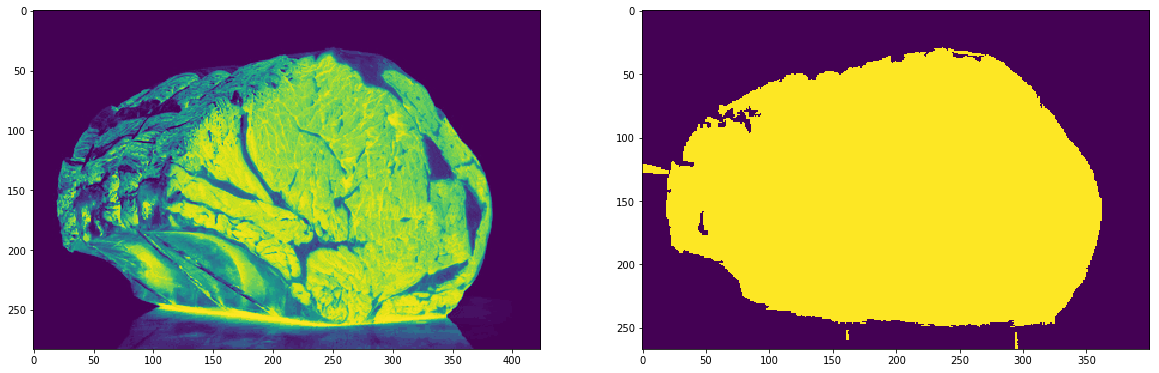

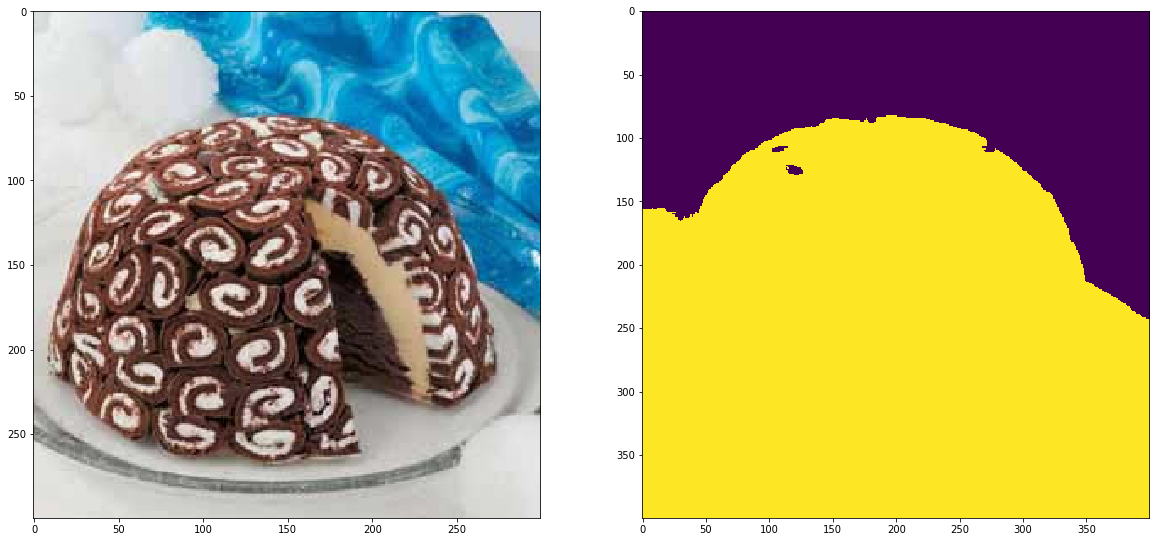

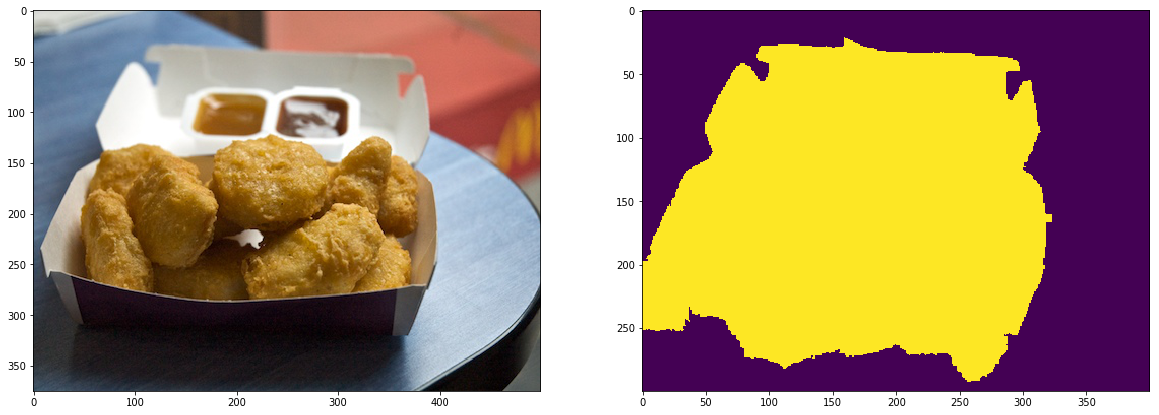

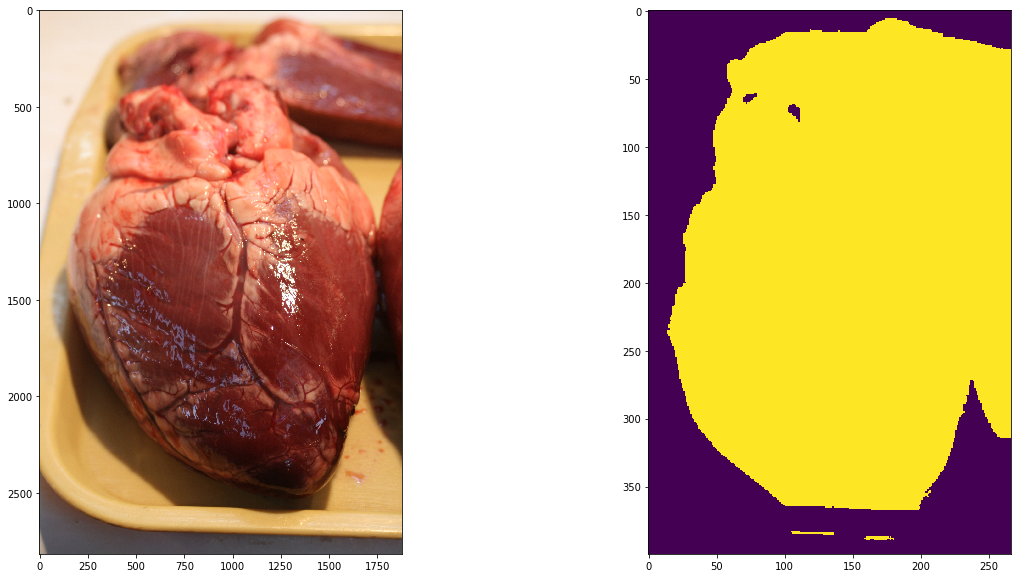

In [21]:
from random import randint
for i in range(0,10):
    rand_id = randint(0,len(all_valed_paths_segs))
    sg = np.array(Image.open(all_valed_paths_segs[rand_id]))
    im = np.array(Image.open(all_valed_paths_imgs[rand_id]))

    sg = np.bitwise_or(np.bitwise_or(
        sg[:, :, 0].astype(np.uint32),
        sg[:, :, 1].astype(np.uint32) << 8),
        sg[:, :, 2].astype(np.uint32) << 16)


    plt.figure(figsize=(20,10))

    plt.subplot(121)
    plt.imshow(im)

    plt.subplot(122)
    plt.imshow(sg)


In [ ]:
imageio.imsave('outfile.', sg)

In [ ]:
np.unique(np.array(Image.open('outfile.png')))

In [22]:
# path_url_seg, _ = get_all_file_in_path(New_segments_path)
# path_url_img, _ = get_all_file_in_path(New_images_path)

path_url_seg = all_valed_paths_segs
path_url_img = all_valed_paths_imgs

In [30]:
from random import randint
rand_id = randint(0,len(path_url_seg))
path_url_seg[rand_id], path_url_img[rand_id]

('other-categories-seg/lemongrass//29.png',
 'othercategories/lemongrass//29.jpg')

In [35]:
imgs = []
segs = []
path = []
for p, s in tqdm(zip(path_url_img, path_url_seg), total=len(path_url_img)):
    try:
        im = scipy.misc.imresize(Image.open(p),(224,224))
        im = np.array(im)[:,:,:3]
          
        sg = scipy.misc.imresize(Image.open(s),(224,224))
        sg = np.array(sg)
   
        sg = np.bitwise_or(np.bitwise_or(
            sg[:, :, 0].astype(np.uint32),
            sg[:, :, 1].astype(np.uint32) << 8),
            sg[:, :, 2].astype(np.uint32) << 16)

                        
                 
        imgs.append(im)
        segs.append(sg)
        path.append([p,s])
    except :
        pass

  0%|          | 0/12478 [00:00<?, ?it/s]/home/arl/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/arl/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':
  5%|▌         | 629/12478 [00:32<10:11, 19.39it/s]/home/arl/.local/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 12478/12478 [10:08<00:00, 20.49it/s]


In [36]:
im_ar = np.array(imgs)
sg_ar = np.expand_dims(np.array(segs), -1)
pt_ar = np.array(path)

In [37]:
im_ar.shape, sg_ar.shape, pt_ar.shape

((12424, 224, 224, 3), (12424, 224, 224, 1), (12424, 2))

In [38]:
np.save("imgs.npy", im_ar)
np.save("segs.npy", sg_ar)
np.save("ids.npy", pt_ar)